In [1]:
import pickle
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use("default")

path_prefix = "checkpoints"


Best val F1@20 for Only author-paper message passing: 0.0324 at step 62000
Best val F1@20 for LightGCN: 0.0770 at step 20000
Best val F1@20 for GNN: 0.0017 at step 5000


/tmp/ipykernel_135051/3299663365.py:55: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


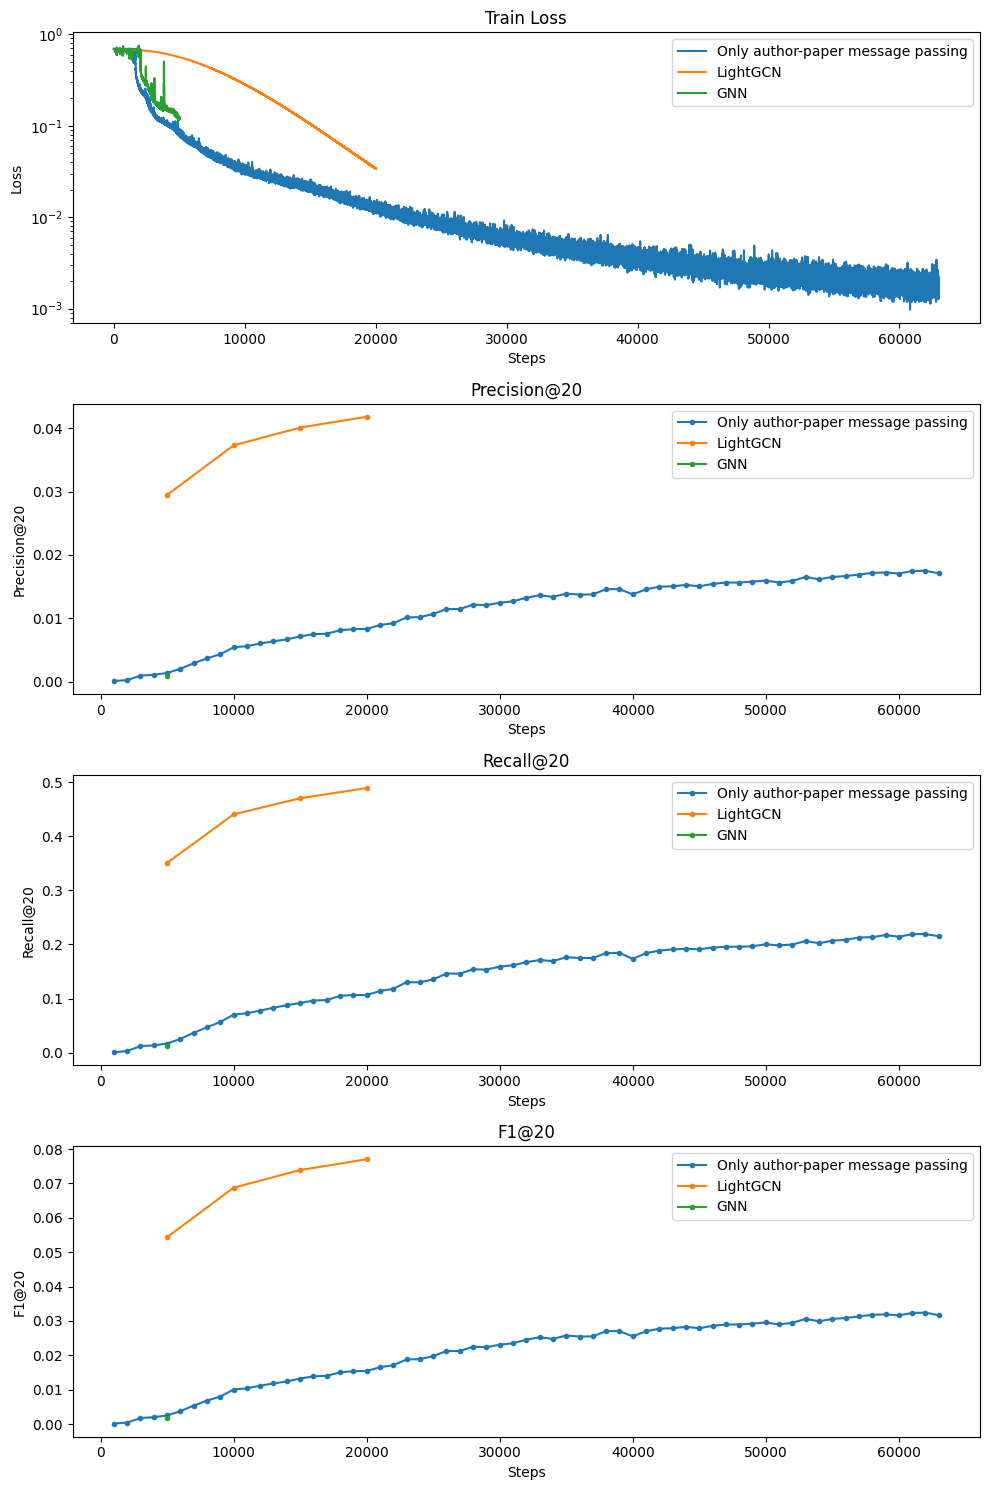

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4, 1,  figsize=(10, 15))

def plot_model_results(metrics_filename, train_loss_steps_filename, label):
    metrics_file = pickle.load(open(os.path.join(path_prefix, metrics_filename), "rb"))
    train_loss_steps_file = pickle.load(open(os.path.join(path_prefix, train_loss_steps_filename), "rb"))
    metrics_file = {key: np.array(value) for key, value in metrics_file.items()}
    # compute val_f1_20 and test_f1_20
    metrics_file["val_f1_20"] = 2 * (metrics_file["val_precision20"] * metrics_file["val_recall20"]) / (metrics_file["val_precision20"] + metrics_file["val_recall20"] + 1e-8)
    #metrics_file["test_f1_20"] = 2 * (metrics_file["test_precision20"] * metrics_file["test_recall20"]) / (metrics_file["test_precision20"] + metrics_file["test_recall20"] + 1e-8)
    best_val_score_idx = np.argmax(metrics_file["val_f1_20"])

    print(f"Best val F1@20 for {label}: {metrics_file['val_f1_20'][best_val_score_idx]:.4f} at step {metrics_file['step'][best_val_score_idx]}")

    ax[0].plot(train_loss_steps_file, label=label)
    ax[0].set_title("Train Loss")
    ax[0].set_xlabel("Steps")
    ax[0].set_ylabel("Loss")
    ax[0].set_yscale("log")
    ax[0].legend()

    steps = metrics_file["step"]
    for prefix in ["val_"]:
        ax[1].plot(steps, metrics_file[prefix + "precision20"], ".-", label=label)
    ax[1].set_title("Precision@20")
    ax[1].set_xlabel("Steps")
    ax[1].set_ylabel("Precision@20")
    ax[1].legend()
    for prefix in ["val_"]:
        ax[2].plot(steps, metrics_file[prefix + "recall20"], ".-", label=label)
    ax[2].set_title("Recall@20")
    ax[2].set_xlabel("Steps")
    ax[2].set_ylabel("Recall@20")
    ax[2].legend()

    ax[3].set_title("F1@20")
    for prefix in ["val_"]:
        ax[3].plot(steps, metrics_file[prefix + "f1_20"], ".-", label=label)
    ax[3].set_xlabel("Steps")
    ax[3].set_ylabel("F1@20")
    ax[3].legend()

#plot_model_results("hetero_model_2_metrics.pkl", "hetero_model_2_train_losses.pkl", label="Author-author message passing")
plot_model_results("hetero_model_1_metrics.pkl", "hetero_model_1_train_losses.pkl", label="Only author-paper message passing")
#plot_model_results("Coauthor_edges_metrics.pkl", "Coauthor_edges_losses.pkl", label="HeteroGraph")
#plot_model_results("metrics_GNN_03.pkl", "loss_GNN_03.pkl", label="Heterogeneous GCN")
#plot_model_results("metrics_GNN_03.pkl", "loss_GNN_03.pkl", label="Heterogeneous GCN")
#plot_model_results("metrics_LightGCN_03.pkl", "loss_LightGCN_03.pkl", label="LightGCN")
#plot_model_results("metrics_GNN_01.pkl", "loss_GNN_01.pkl", label="Heterogeneous GCN with 10% supervision")
plot_model_results("metrics_LightGCN_full.pkl", "loss_LightGCN_full.pkl", label="LightGCN")
plot_model_results("metrics_GNN_full.pkl", "loss_GNN_full.pkl", label="GNN")


fig.tight_layout()
fig.show()
fig.savefig("model_comparison_plots.png", dpi=450)
